<a href="https://colab.research.google.com/github/LukynZa/Breast-cancer/blob/main/breast_cancer_(classification_project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import pandas as pd
import matplotlib as plt
import numpy as np


In [71]:
data = load_breast_cancer()

In [72]:
data_df = pd.DataFrame(data = data.data, columns = data.feature_names)
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [73]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [74]:
data_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [75]:
featureMeans = list(data_df.columns[0:9])

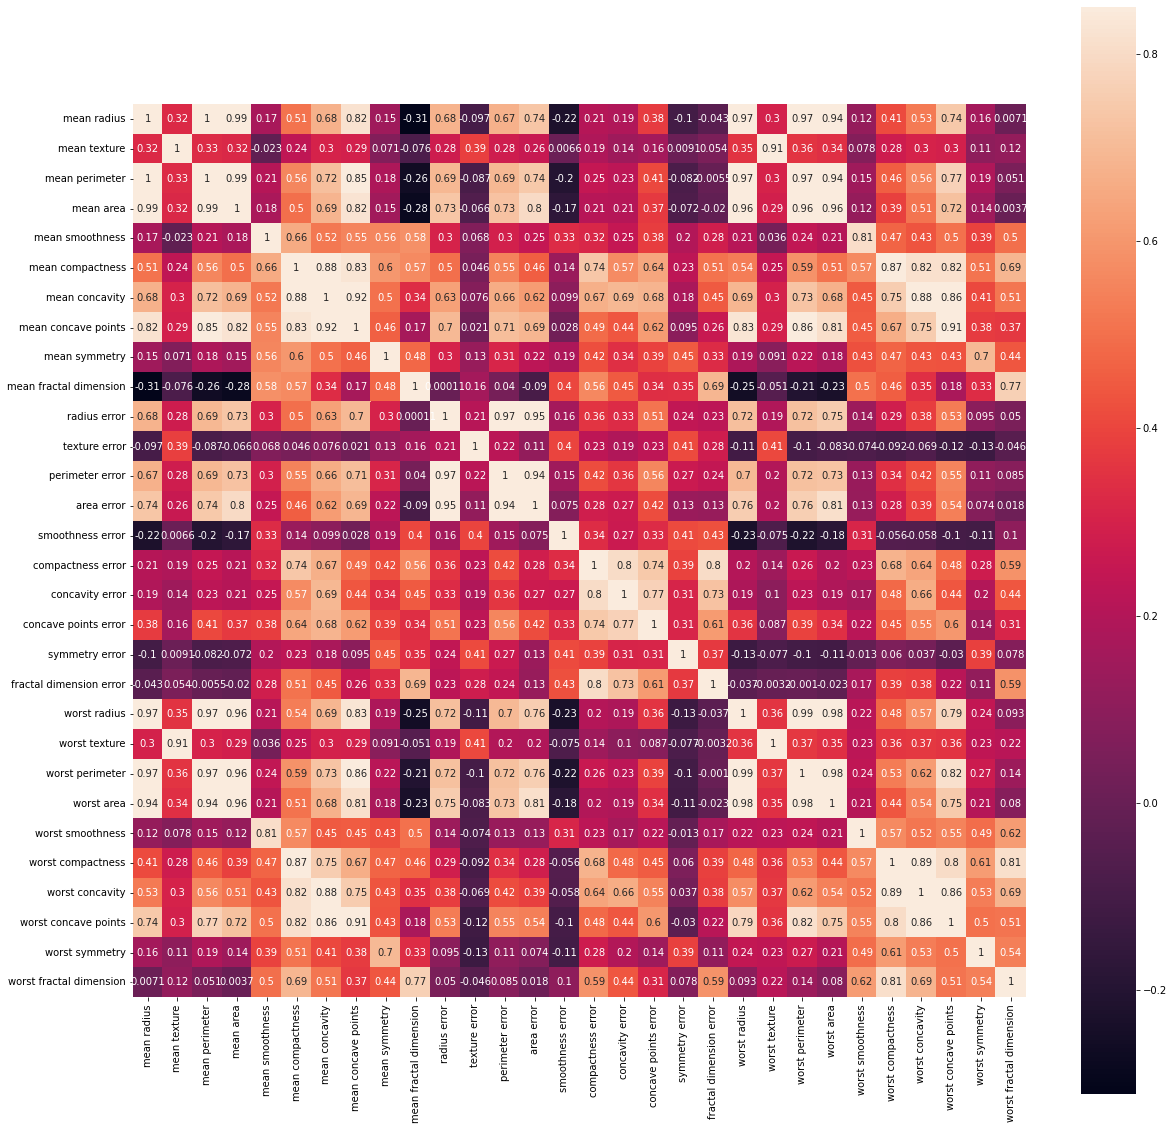

In [76]:
import matplotlib.pyplot as plt
corrmat = data_df.corr(method='pearson',)
ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax=0.85, annot=True, square=True, annot_kws={'size': 10});
plt.show()

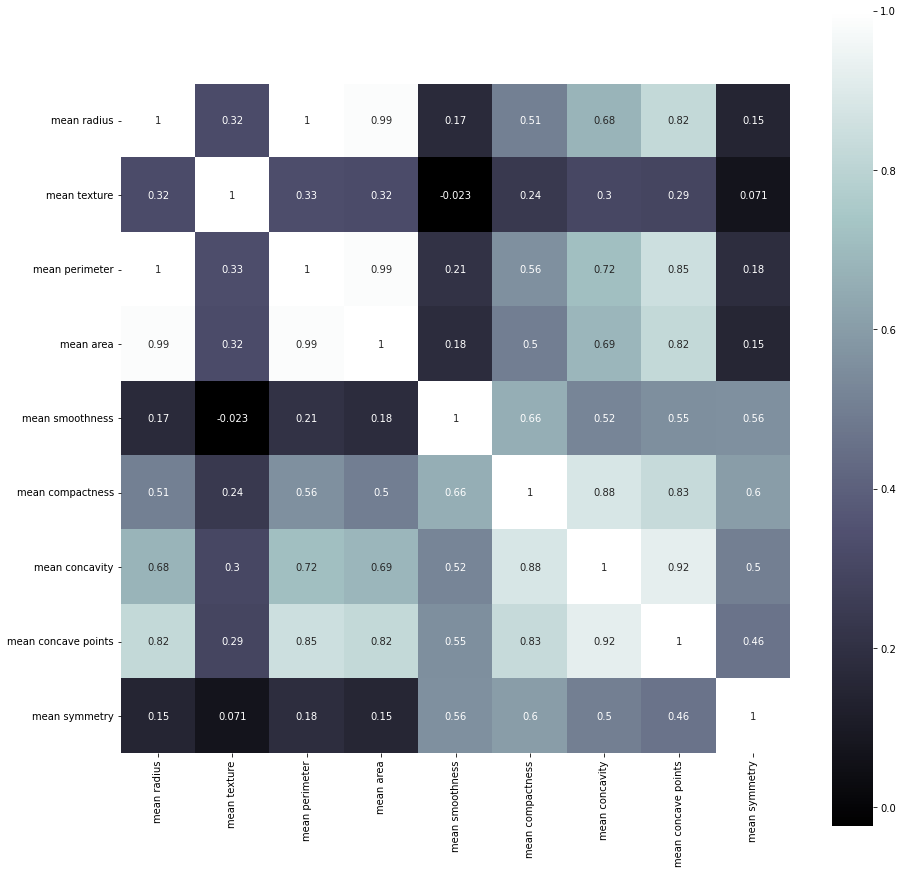

In [77]:
plt.figure(figsize=(15,15))
sns.heatmap(data_df[featureMeans].corr(), annot=True, square=True, cmap='bone')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


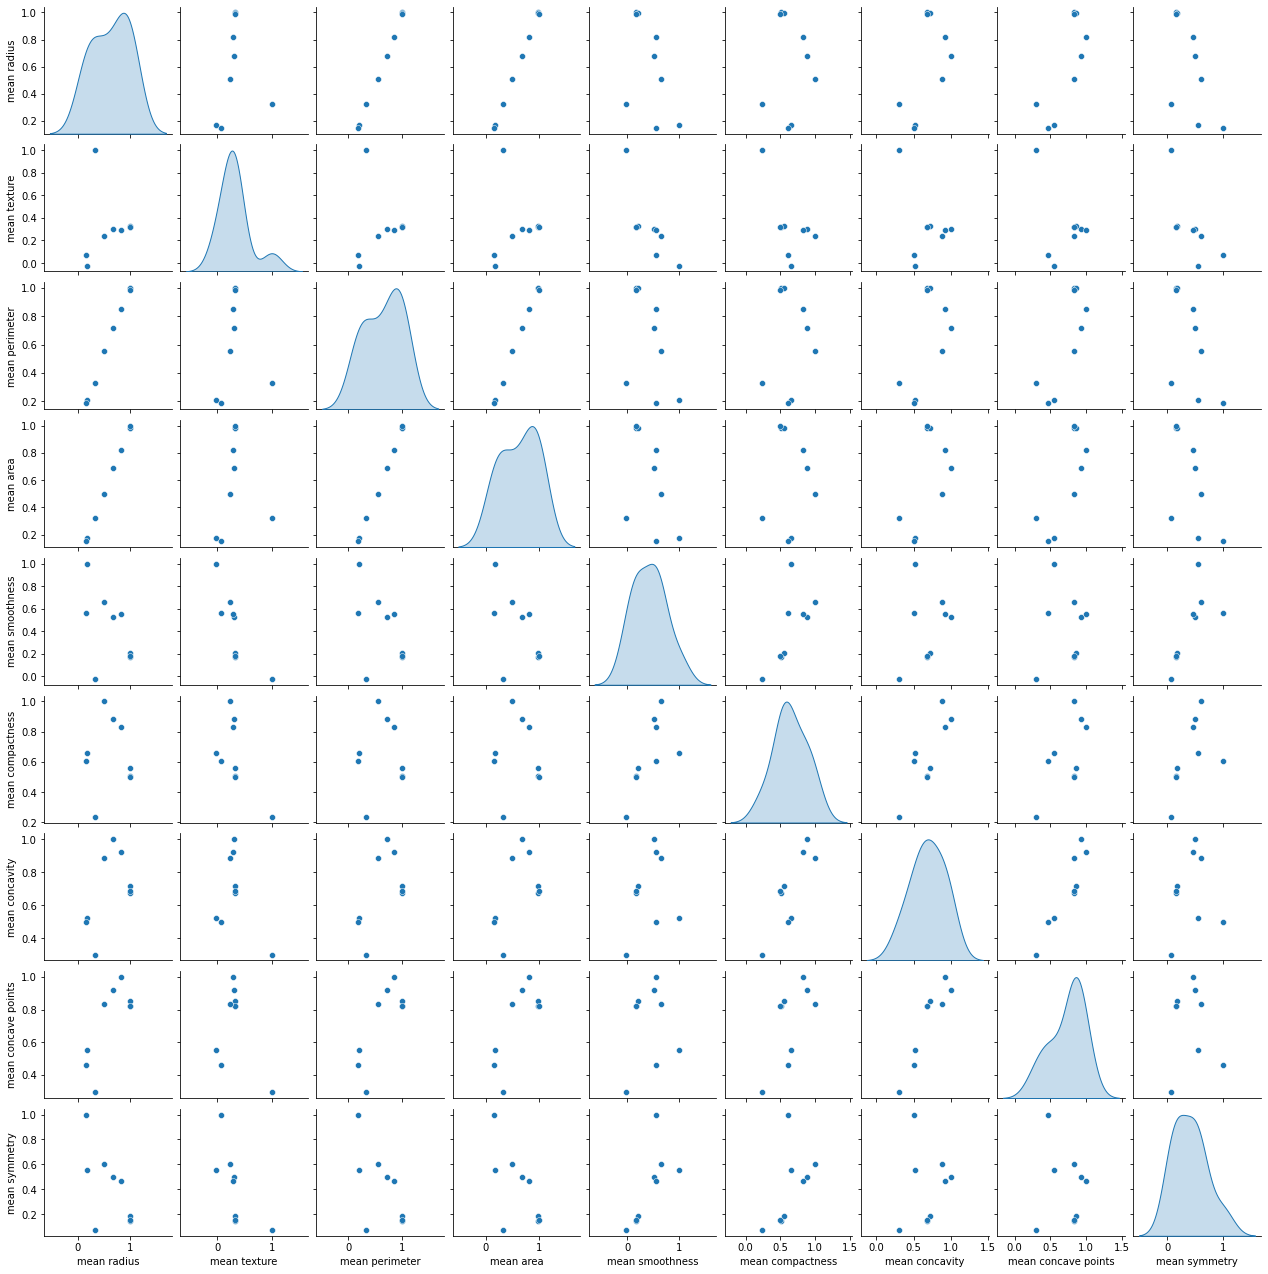

In [78]:
correlationData = data_df[featureMeans].corr()
sns.pairplot(data_df[featureMeans].corr(), diag_kind='kde', size=2);

In [79]:
features = data.data
target = data.target
features_name = data.feature_names
target_name = data.target_names

In [80]:
target_name

array(['malignant', 'benign'], dtype='<U9')

In [81]:
X_train, X_test, y_train, y_test = train_test_split(data_df, target, test_size=0.15, random_state=42)

In [82]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier().fit(X_train, y_train)

In [83]:
from sklearn.svm import SVC
svm = SVC(probability=True).fit(X_train, y_train)

In [84]:
pred = rfc.predict(X_test)

In [85]:
y_scores = rfc.predict_proba(X_test)

In [86]:
feature = data.feature_names
target = data.target

In [87]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9534883720930233

In [88]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[29,  3],
       [ 1, 53]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


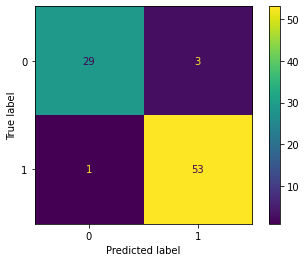

In [89]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rfc, X_test, y_test)  
plt.show()

In [90]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_test, pred))
print(recall_score(y_test, pred))

0.9464285714285714
0.9814814814814815


In [91]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_scores[:,1])
auc

0.9953703703703703

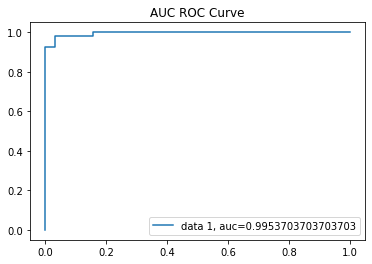

In [92]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_pred_proba = rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title("AUC ROC Curve")
plt.show()

In [93]:
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

In [94]:
fp

3

In [95]:
from joblib import dump, load
dump(rfc, 'RandomForestClass.pkl') 

['RandomForestClass.pkl']

In [96]:
models = [
    LogisticRegression(),
    RandomForestClassifier(),
    SVC(probability=True)
    ]

In [97]:
from sklearn.metrics import classification_report

#Train and score algorithms
for m in models:
    
    m.fit(X_train, y_train)
    pred = m.predict(X_test)
    acc = accuracy_score(y_test, pred) 
    
    print(m.__class__.__name__)
    print("-----------------------")
    print(classification_report(y_test, pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression
-----------------------
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        32
           1       0.93      1.00      0.96        54

    accuracy                           0.95        86
   macro avg       0.97      0.94      0.95        86
weighted avg       0.96      0.95      0.95        86

RandomForestClassifier
-----------------------
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        32
           1       0.95      0.98      0.96        54

    accuracy                           0.95        86
   macro avg       0.96      0.94      0.95        86
weighted avg       0.95      0.95      0.95        86

SVC
-----------------------
              precision    recall  f1-score   support

           0       1.00      0.84      0.92        32
           1       0.92      1.00      0.96        54

    accuracy                           0.94        86
   macro a